In [1]:
# pip install findspark

In [2]:
import seaborn as sns
print('sns',sns.__version__)

sns 0.10.0


In [3]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName("Demo example of plot").getOrCreate()
sc = spark.sparkContext

In [6]:
df = spark.read.json(r"F:\Twitter\account_and_user\tweets\football_data.json")
df.createOrReplaceTempView("tweet_table")

In [7]:
query1 = spark.sql("select place.country,count(*) As Count from tweet_table where place.country is not null GROUP BY place.country ORDER BY count "
                  "DESC limit 10")

In [8]:
import matplotlib.pyplot as plt
import pandas

In [9]:
query1.show()

pd = query1.toPandas()

+--------------+-----+
|       country|Count|
+--------------+-----+
| United States| 3056|
|United Kingdom|  974|
|        Brasil|  643|
|        México|  476|
|       Nigeria|  283|
|        España|  267|
|     Argentina|  263|
|      Colombia|  154|
|        France|  144|
|  South Africa|  140|
+--------------+-----+



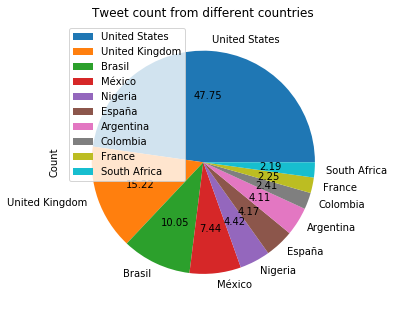

In [19]:
pd.country.values.tolist()
pd.plot.pie(y='Count',labels=pd.country.values.tolist(),figsize=(5,10),autopct='%.2f',title="Tweet count from different countries")

,country,Count
0,United States,3056
1,United Kingdom,974
2,Brasil,643
3,México,476
4,Nigeria,283
5,España,267
6,Argentina,263
7,Colombia,154
8,France,144
9,South Africa,140


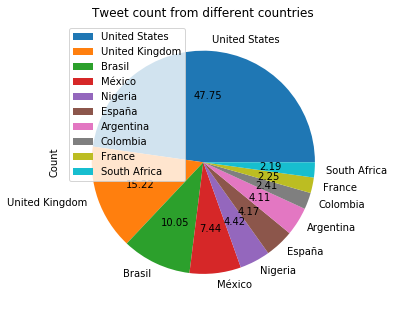

In [15]:
dd = {"data":pd,"graph":pd.plot.pie(y='Count',labels=pd.country.values.tolist(),figsize=(5,10),autopct='%.2f',title="Tweet count from different countries")}

In [36]:
import pickle
with open("query1.pk2",'ab') as file:
    pickle.dump(dd,file)

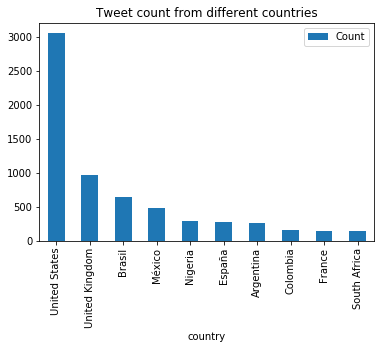

In [11]:
pd.plot.bar(x="country",y="Count",title="Tweet count from different countries")

In [12]:
query2 = spark.sql("select user.name,retweeted_status.text as Retweet_Text,retweeted_status.retweet_count as Retweet_Count from tweet_table where retweeted_status.retweet_count is not null order by retweeted_status.retweet_count desc limit 10")
query2.show()

+----------------+------------------------------+-------------+
|            name|                  Retweet_Text|Retweet_Count|
+----------------+------------------------------+-------------+
|             ash|          Our story. Our aw...|       245540|
|       Nat Nat🖤|          So a month ago I ...|       222756|
|          Summer|          So a month ago I ...|       222754|
|    Lucas Ferkol|          If golf and socce...|       219128|
|💜REBECA becky💜|[#오늘의방탄] 아미와 방탄.....|       183615|
|        May 22nd|          This son bought h...|       173951|
|        Adelaide|          Brit Awards. Than...|       147956|
|  Andrea loves Z|          This kid is so co...|       136926|
|           Ruben|          Si Mbappé ficha p...|       134065|
|   💜BTSpopie⁷💜|          thank you 💕 http...|       108975|
+----------------+------------------------------+-------------+



In [13]:
pd_query2 = query2.toPandas()

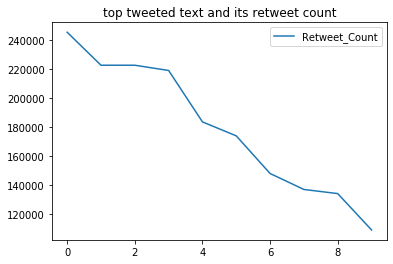

In [14]:
# pd_query2.plot.bar(x="name",y="Retweet_Count",title="User with more tweets for his tweets")
pd_query2.plot(title="top tweeted text and its retweet count")

In [15]:
query3 = spark.sql("select user.location,count(text) as tweet_count from tweet_table where place.country='United States'and "
                   "user.location is not null Group By user.location ORDER BY tweet_count DESC LIMIT 15")

query3.show()

+----------------+-----------+
|        location|tweet_count|
+----------------+-----------+
|     Houston, TX|         40|
|     Chicago, IL|         40|
| Los Angeles, CA|         37|
|     Atlanta, GA|         29|
|   United States|         26|
|      Dallas, TX|         24|
| San Antonio, TX|         21|
|Philadelphia, PA|         21|
|    Florida, USA|         20|
|      Austin, TX|         20|
|    Columbus, OH|         19|
|   Nashville, TN|         19|
|    New York, NY|         19|
| California, USA|         18|
|   Las Vegas, NV|         17|
+----------------+-----------+



In [16]:
pd_query3 = query3.toPandas()

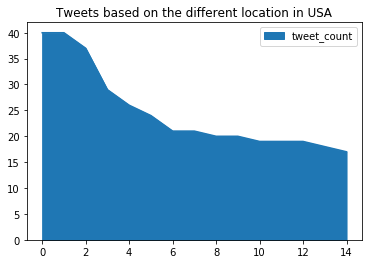

In [17]:
# pd_query3
# pd.country.values.tolist(
pd_query3.plot.area(y="tweet_count",title="Tweets based on the different location in USA")
# pd_query3.plot(kind='pie',y ='tweet_count',labels=pd_query3.location.values.tolist())
# pd_query3.plot.pie(y='count',labels=pd_query3.location.values.tolist(),figsize=(5,10))

In [18]:
query4 = spark.sql("select user.screen_name,text,retweeted_status.retweet_count from tweet_table order by retweeted_status.retweet_count DESC limit 20")
query4.show()

+---------------+--------------------+-------------+
|    screen_name|                text|retweet_count|
+---------------+--------------------+-------------+
|     ashtesolim|RT @justinbieber:...|       245540|
|The_Names_Tally|RT @ginaawilsonn:...|       222756|
|  smessercola__|RT @ginaawilsonn:...|       222754|
|   lucas_ferkol|RT @johnbcrist: I...|       219128|
|   Rbkmj27Becky|RT @bts_bighit: [...|       183615|
|      Dee_H3rbo|RT @Charles436314...|       173951|
| Adelaide_RoseX|RT @Harry_Styles:...|       147956|
|     zaddyxgirl|RT @iamsrk: This ...|       136926|
|       Neburr12|RT @DjMaRiiO_90: ...|       134065|
| huda_BTS7kings|RT @BTS_twt: than...|       108975|
|0xY0DBLfiWnimff|RT @Cristiano: So...|       108795|
|  Ismaeal_babah|RT @Cristiano: So...|       108788|
|     sun_ny_cr7|RT @Cristiano: So...|       108787|
|       suchiimi|RT @MillennialOfM...|        92371|
|      JIMlNICAN|RT @MillennialOfM...|        92363|
|     JuchuJuchu|RT @MillennialOfM...|        

In [19]:
pd_query4 = query4.toPandas()

In [1]:
# sns.catplot(x="retweet_count",y="text",data=pd_query4)
# pd_query4.plot.hist(stacked=True, bins=20,alpha=0.5)
# pd_query4.plot.box(pd_query4.screen_name.tolist())
pd_query4.plot.scatter(x="retweet_count",y='screen_name',color='DarkBlue', s=50)
plt.title("Users with more no of retweets for his tweet")
# pd_query4.plot.bar(x="screen_name",y="retweet_count",title="User with more tweets for his tweets")
# radviz(pd_query4,'retweet_count')

NameError: name 'pd_query4' is not defined

In [21]:
query5 = spark.sql("select count(*) as count,q.text from (select case when text like '%fcb%' then 'fc barcelona' when "
                  " text like '%real madrid%' then 'real madrid' when text like '%fifa%' then 'fifa' when text"
                  " like '%la liga%' then 'la liga' when text like '%nfl%' then 'nfl' when text like '%arsenal%' "
                  " then 'arsenal' when text like '%chelsea%' then 'chelsea fc' when text like '%manchester%' "
                  " then 'manchester' when text like '%psg%' then 'psg' when text like '%premier league%' then 'premier league'"
                  " end as text from "
                  " tweet_table)q group by q.text")
query5.show()

+------+--------------+
| count|          text|
+------+--------------+
|533598|          null|
|   289|       arsenal|
|   213|   real madrid|
|  4636|           nfl|
|   499|           psg|
|    75|    chelsea fc|
|  2676|       la liga|
|    17|    manchester|
|    83|premier league|
|   536|  fc barcelona|
|  6513|          fifa|
+------+--------------+



In [22]:
pd_query5 = query5.toPandas()

Text(0.5, 1, 'Tweets based on the different league matches')

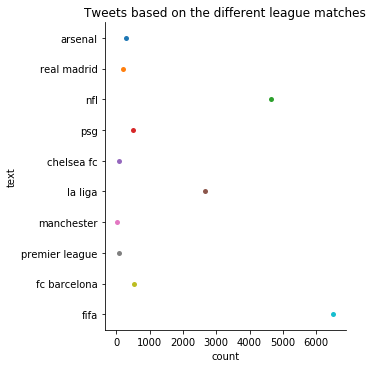

In [23]:
sns.catplot(y="text", x="count",kind="swarm", data=pd_query5.dropna())
plt.title("Tweets based on the different league matches")

In [24]:
query6 = spark.sql("select user.screen_name, max(user.followers_count)as followers_count from tweet_table where text "
                  " like '%football%' group by user.screen_name, user.lang order by followers_count desc limit 15")
query6.show()

+-------------+---------------+
|  screen_name|followers_count|
+-------------+---------------+
|          NFL|       25264898|
| TheEconomist|       24595917|
|       ManUtd|       21682621|
|     guardian|        8639812|
|     BBCSport|        8375940|
|      lequipe|        5151027|
|     Patriots|        4603729|
|     USATODAY|        4061642|
|          THR|        3223404|
| guardiannews|        3138150|
|      BBCMOTD|        2917306|
| RealPaigeWWE|        2556725|
|     SkySport|        2459605|
|  chrislhayes|        2103570|
|notthefakeSVP|        2037971|
+-------------+---------------+



In [ ]:
pd_query6 = query6.toPandas()

In [ ]:
sns.catplot(y="screen_name",x="followers_count", kind="violin",data=pd_query6)
plt.title("User with more no of followers")

In [ ]:
query7 = spark.sql("select count(*) as NumberOfTweets, 'Android' as Source from tweet_table where source like '%Twitter for Android%' UNION select count() as NumberOfTweets, 'IPhone' as Source from tweet_table where source like '%Twitter for iPhone%' UNION select count() as NumberOfTweets, 'IPad' as Source from tweet_table where source like '%Twitter for iPad%' UNION select count() as NumberOfTweets, 'Web' as Source from tweet_table where source like '%Twitter Web App%'")
query7.show()

In [ ]:
pd_query7 = query7.toPandas()

In [ ]:
# sns.pairplot(y="NumberOfTweets",x="Source",data=pd_query5)
pd_query7.plot.line(y="NumberOfTweets",x="Source",title="Tweets from different Sources")

In [ ]:
day_data = spark.sql("SELECT substring(user.created_at,1,3) as day from tweet_table where text is not null")
day_data.createOrReplaceTempView("day_data")

days_final = spark.sql(
          """ SELECT Case
            when day LIKE '%Mon%' then 'WEEKDAY'
            when day LIKE '%Tue%' then 'WEEKDAY'
            when day LIKE '%Wed%' then 'WEEKDAY'
            when day LIKE '%Thu%' then 'WEEKDAY'
            when day LIKE '%Fri%' then 'WEEKDAY'
            when day LIKE '%Sat%' then 'WEEKEND'
            when day LIKE '%Sun%' then 'WEEKEND'
             else
             null
             end as day1 from day_data where day is not null""")
days_final.createOrReplaceTempView("days_final")
query8 = spark.sql("SELECT day1 as Day,Count(*) as Day_Count from days_final where day1 is not null group by day1 order by count(*) desc")
query8.show()

In [ ]:
pd_query8 = query8.toPandas()

In [ ]:
pd_query8.plot.pie(y="Day_Count",labels=pd_query8.Day.tolist(),autopct='%.2f',title="On which Day More Tweets are posted")

In [ ]:
query9 = spark.sql("select count(*) as count,lang from tweet_table where text like '%la liga%' group by lang order by count desc")
query9.show()

In [ ]:
pd_query9 = query9.toPandas()

In [ ]:
sns.set()
# sns.lineplot( x ="country",y="Count", data=pd)
sns.catplot(x ="lang",y="count",data=pd_query9)
plt.title("Tweet count based on language")
# pd_query10
# sns.catplot(x ="hour",y="tweets_count", kind="violin",style = "smoker" ,split=True,data=pd_query9)

In [ ]:

timehour = spark.sql("SELECT SUBSTRING(created_at,12,2) as hour from tweet_table where text is not null")

timehour.createOrReplaceTempView("timehour")
timeAnalysis=spark.sql("SELECT Case when hour>=0 and hour <4 then 'midnight' when hour>=4 and hour <7 then 'earlymorning' "
            " when hour>=7 and hour <12 then 'Day-time' when hour>=12 and hour <15 then 'afternoon' when hour>=15 and "
            " hour <18 then 'evening' when hour>=18 and hour <=23 then 'Night-time' end as time from timehour")

timeAnalysis.createOrReplaceTempView("timeAnalysis")
query10 = spark.sql("SELECT time as hour,Count(*) as tweets_count from timeAnalysis where time is not null group by time order by count(*) desc")
query10.show()

In [ ]:
pd_query10 = query10.toPandas()

In [ ]:
sns.set()
# sns.lineplot( x ="country",y="Count", data=pd)
# sns.relplot(x ="hour",y="tweets_count", data=pd_query10)
# pd_query10
sns.catplot(x ="hour",y="tweets_count", kind="violin",style = "smoker" ,split=True,data=pd_query10)
plt.title("Tweet count on hourly bases")